**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.api import abline_plot
import pylab as pl
%matplotlib inline
%pylab inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

<Container object of 3 artists>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


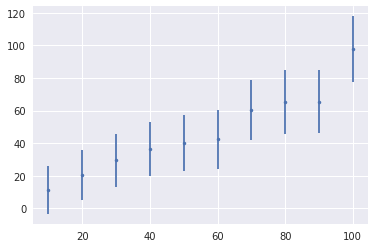

In [13]:
np.random.seed(99)
sns.set_style('darkgrid')
X = np.linspace(10,100,10)
Y = line(0.8,X,b=0,errors=errors)
# plt.scatter(X,Y)
plt.errorbar(X,Y,yerr=errors(y),fmt='.')


# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print(X)
print(Y)
print(sm.add_constant(X))

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
[ 11.21388959  20.49946246  29.46261479  36.51840135  40.00459332
  42.31992195  60.28735811  65.18876141  65.41943485  97.59628989]
[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [5]:
X_con = sm.add_constant(X)
smfit = sm.OLS(Y, X_con).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     108.7
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.20e-06
Time:                        18:20:57   Log-Likelihood:                -32.668
No. Observations:                  10   AIC:                             69.34
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0466      4.847      0.422      0.684        -9.131    13.224
x1             0.8146      0.078     10.428      0.000         0.634     0.995
==============================================================================
Omnibus:                        2.235   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                0.422
Skew:                           0.466   Prob(JB):                        0.810
Kurtosis:                       3.380   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


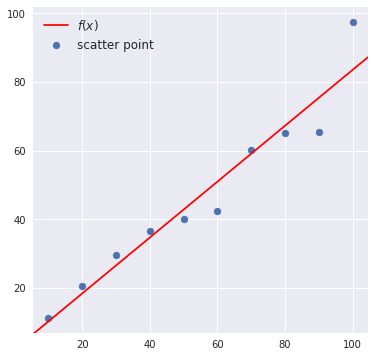

In [6]:
figure, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y,label='scatter point')
abline_plot(model_results=smfit, ax=ax, color='red',label='$f(x)$')
plt.legend(fontsize=12)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

<Container object of 3 artists>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


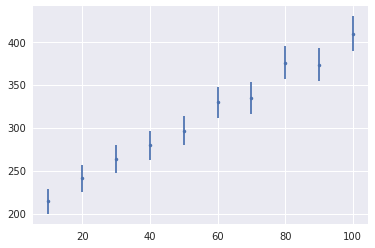

In [14]:
Y = line(2,X,b=200,errors=errors)
plt.errorbar(X,Y,yerr=errors(Y),fmt='.')

# 6. repeat step 3

In [8]:
X_con = sm.add_constant(X)
smfitDoneRight = sm.OLS(Y, X_con).fit()
smfitDoneRight.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     616.5
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           7.40e-09
Time:                        18:20:57   Log-Likelihood:                -33.402
No. Observations:                  10   AIC:                             70.80
Df Residuals:                       8   BIC:                             71.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        196.8166      5.216     37.730      0.000       184.788   208.846
x1             2.0873      0.084     24.829      0.000         1.893     2.281
==============================================================================
Omnibus:                        0.103   Durbin-Watson:                   3.554
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.322
Skew:                          -0.034   Prob(JB):                        0.851
Kurtosis:                       2.123   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [18]:
weight = errors(Y)
smfmodel = sm.WLS(Y,X_con, weights=list(1/errors(Y))).fit()
smfmodel.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            WLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     662.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.56e-09
Time:                        19:39:35   Log-Likelihood:                -33.081
No. Observations:                  10   AIC:                             70.16
Df Residuals:                       8   BIC:                             70.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        196.7275      4.830     40.730      0.000       185.589   207.866
x1             2.0877      0.081     25.742      0.000         1.901     2.275
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   3.529
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.396
Skew:                          -0.033   Prob(JB):                        0.820
Kurtosis:                       2.028   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

In [16]:
x = X
y = Y

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


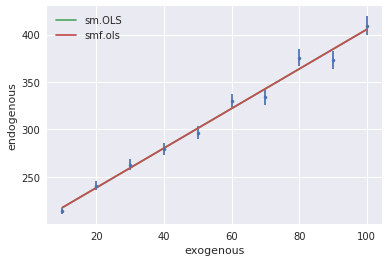

In [17]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();